In [1]:
#Import the necessary packages 
import pandas as pd
import datetime as dt
import calendar
import numpy as np

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
retail = pd.read_csv("I:\\saledreg.csv")

In [7]:
retail.head()

,Reference,Date,Month,Party Name,Item Name,Billed Quantity,Rate,Amount,USD RATE,AMOUNT IN INR,Region,STATES
0,Apr18/USA/001,04/30/2018,04/18/2019,A and O,XR,58.0,15.0,870.0,66.47,57828.9,US,PA
1,Apr18/USA/001,04/30/2018,04/18/2019,A and O,XR,39.0,20.0,780.0,66.47,51846.6,US,PA
2,Apr18/USA/002,04/30/2018,04/18/2019,Albert Einstein_x000D_\n,CT,494.0,33.5,16549.0,66.47,1100012.03,US,US
3,Apr18/USA/002,04/30/2018,04/18/2019,Albert Einstein_x000D_\n,MR,3.0,50.0,150.0,66.47,9970.5,US,US
4,Apr18/USA/002,04/30/2018,04/18/2019,Albert Einstein_x000D_\n,US,44.0,33.5,1474.0,66.47,97976.78,US,US


In [8]:
newdata = retail[['Date', 'Party Name', 'Item Name','Billed Quantity','Amount','STATES']].copy()

In [16]:
newdata.isnull().sum()
newdata.dropna(how='any',inplace=True)     

Date               0
Party Name         0
Item Name          0
Billed Quantity    0
Amount             0
STATES             0
dtype: int64

In [18]:
newdata.head()

,Date,Party Name,Item Name,Billed Quantity,Amount,STATES
0,04/30/2018,A and O,XR,58.0,870.0,PA
1,04/30/2018,A and O,XR,39.0,780.0,PA
2,04/30/2018,Albert Einstein_x000D_\n,CT,494.0,16549.0,US
3,04/30/2018,Albert Einstein_x000D_\n,MR,3.0,150.0,US
4,04/30/2018,Albert Einstein_x000D_\n,US,44.0,1474.0,US


In [28]:
test1=newdata

In [30]:
test1['DoP'] = pd.to_datetime(test1['Date'])

In [31]:
test1.head()

,Date,Party Name,Item Name,Billed Quantity,Amount,STATES,DoP
0,04/30/2018,A and O,XR,58.0,870.0,PA,2018-04-30
1,04/30/2018,A and O,XR,39.0,780.0,PA,2018-04-30
2,04/30/2018,Albert Einstein_x000D_\n,CT,494.0,16549.0,US,2018-04-30
3,04/30/2018,Albert Einstein_x000D_\n,MR,3.0,150.0,US,2018-04-30
4,04/30/2018,Albert Einstein_x000D_\n,US,44.0,1474.0,US,2018-04-30


In [37]:
item_aggr = test1.groupby(['DoP', 'Item Name']).agg({'Billed Quantity': lambda x: x.sum(), # Total volume
                                        'Amount': lambda x: x.sum()}) # Monetary Value

In [38]:
party_aggr= test1.groupby(['DoP', 'Party Name']).agg({'Billed Quantity': lambda x: x.sum(), # Total volume
                                        'Amount': lambda x: x.sum()}) # Monetary Value

In [40]:
party_aggr.head(20)

Billed Quantity  \
DoP        Party Name                                                         
2018-04-30 A and O                                                     97.0   
           AMM                                                        293.0   
           Albert Einstein_x000D_\n                                   541.0   
           Backus-Norwich_x000D_\n                                    684.0   
           Boone & Fitzgibbon_x000D_\n                                316.0   
           Bothwell                                                   237.0   
           Bradley_x000D_\n                                            79.0   
           Breckenridge                                               233.0   
           Bristol_x000D_\n                                           273.0   
           Carney (Steward Health Group)                              392.0   
           Caverna_x000D_\n                                           108.0   
           Chicago-Trinty & Loretto                                   390.0   
           Clara Maass Medical Center                                 700.0   
           DRA-Waterbury_x000D_\n                                     454.0   
           Danbury_x000D_\n                                           864.0   
           Einstein Montgomery  (Albert Einstein)_x000D_\n            494.0   
           FHP_x000D_\n                                                 5.0   
           GREENWICH_x000D_\n                                         351.0   
           Georgia West Imaging-Tanner_x000D_\n                       642.0   
           Good Sam (Steward Health Group)                            739.0   

                                                              Amount  
DoP        Party Name                                                 
2018-04-30 A and O                                           1650.00  
           AMM                                              16115.00  
           Albert Einstein_x000D_\n                         18173.00  
           Backus-Norwich_x000D_\n                          21204.00  
           Boone & Fitzgibbon_x000D_\n                       9754.50  
           Bothwell                                          7568.00  
           Bradley_x000D_\n                                  2898.50  
           Breckenridge                                      4882.00  
           Bristol_x000D_\n                                  8463.00  
           Carney (Steward Health Group)                    10759.00  
           Caverna_x000D_\n                                  3451.00  
           Chicago-Trinty & Loretto                         14097.00  
           Clara Maass Medical Center                       23514.00  
           DRA-Waterbury_x000D_\n                           13830.25  
           Danbury_x000D_\n                                 27100.38  
           Einstein Montgomery  (Albert Einstein)_x000D_\n  16549.00  
           FHP_x000D_\n                                       387.00  
           GREENWICH_x000D_\n                               13992.00  
           Georgia West Imaging-Tanner_x000D_\n             25920.00  
           Good Sam (Steward Health Group)                  20099.00

In [41]:
item_aggr.head(20)

Billed Quantity     Amount
DoP        Item Name                            
2018-04-30 CT                 21520.0  720108.13
           MG                    50.0    1850.00
           MIN                    8.0     247.00
           MR                  1148.0   45647.00
           NM                    96.0    2961.50
           US                  3697.0   87708.75
           XR                  8413.0   33000.25
2018-05-01 NM                     2.0      80.00
2018-05-31 CT                 23303.0  771750.83
           MG                    20.0     710.00
           MIN                   11.0     343.50
           MR                  1287.0   47878.50
           NM                   105.0    3383.50
           OTHERS                13.0    1235.00
           US                  3902.0   90248.00
           XR                  8168.0   27009.00
2018-06-30 CT                 23366.0  778530.44
           MG                    26.0     962.00
           MIN                   16.0     501.50
           MR                  1332.0   53231.50

In [42]:
#Top revenue generating products
Products_by_Revenue = test1.groupby(by='Item Name')['Amount'].sum().sort_values(ascending=False)
Products_by_Revenue.head(10)

Item Name
CT        10226971.69
US         1141353.66
MR          696274.10
XR          370585.25
NM           39788.44
XR           35091.88
OTHERS       15505.46
NM           10749.34
MG            4331.00
MIN           3996.00
Name: Amount, dtype: float64

In [43]:
#Bottom 10 products with respect to revenue
Products_by_Revenue.tail(10)

Item Name
MR          696274.10
XR          370585.25
NM           39788.44
XR           35091.88
OTHERS       15505.46
NM           10749.34
MG            4331.00
MIN           3996.00
Minimum        445.00
3D CASES       252.00
Name: Amount, dtype: float64

In [44]:
#Top revenue generating customers
Customers_by_Revenue = test1.groupby(by='Party Name')['Amount'].sum().sort_values(ascending=False)
Customers_by_Revenue.head(10)

Party Name
Inspira_x000D_\n                             805676.04
JHAH                                         759092.00
Lourdes_x000D_\n                             705384.00
SouthCoast                                   547972.60
St. Joseph Regional Medical Center           454156.00
Self Regional                                420640.38
Danbury_x000D_\n                             382053.54
L & M Hospital (Ocean Radiology)_x000D_\n    369781.00
Susquehanna Imaging Associates_x000D_\n      359768.75
Mercy Medical Center                         349029.00
Name: Amount, dtype: float64

In [45]:
#Bottom 10 customers
Customers_by_Revenue.tail(10)

Party Name
Cardio                                               15016.5
Pershing_x000D_\n                                    13110.5
PMX (Alpha-MXI)_x000D_\n                             10060.0
Sono                                                  7536.0
Advanced MRI                                          4984.0
Cross-Sectional Imaging Consultants Inc. (Malaro)     4788.0
Landmark Cancer Center                                2720.0
Galkayo                                                995.0
Prima_x000D_\n                                         605.0
Bayelsa                                                 29.0
Name: Amount, dtype: float64

In [46]:
#Track the total sales month on month
Month_Wise_Monetary = test1.groupby(['DoP']).agg({'Amount': lambda x: x.sum()}) # Monetary Value

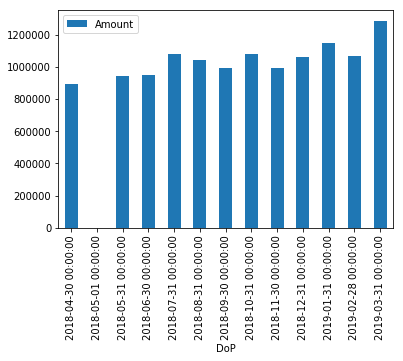

In [47]:
%matplotlib inline
Month_Wise_Monetary.plot(kind="bar")